In [1]:
import sys
import os
import numpy as np
import cortex
import matplotlib.pyplot as plt
import pickle
from nilearn.plotting import view_img
import nibabel as nib
import subprocess as sp
import shlex



In [2]:
#test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputon7_voxels/80/TYPEA_ONOFF.npy'
#test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputon7_voxels/80/TYPEB_FITHRF.npy'
#test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputon7_voxels/80/TYPEC_FITHRF_GLMDENOISE.npy'
test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputon7_voxels/80/TYPED_FITHRF_GLMDENOISE_RR.npy'
fs_dir = '/tank/shared/2022/arrow_of_time/preproc7/sourcedata/freesurfer'

test_data = np.load(test_data_path, allow_pickle=True).item()
#print(test_data)


for key in test_data:
    print(key)
#onoffR2 = test_data['onoffR2']
R2 = test_data['R2']
meanvol = test_data['meanvol']
#noisepool = test_data['noisepool']
HRFindex = test_data['HRFindex']
fracvalue = test_data['FRACvalue']
# print(test_data['meanvol'])
#print(test_data['noisepool'].shape)
#print(test_data['R2'].shape)
#print(noisepool)

betas = test_data['betasmd']
print(betas.shape)
# #switch the first and second dimension
# betas = np.swapaxes(betas,0,1)

betamean = np.mean(betas,axis=3)
print(betamean.shape)



HRFindex
HRFindexrun
glmbadness
pcvoxels
pcnum
xvaltrend
noisepool
pcregressors
betasmd
R2
R2run
rrbadness
FRACvalue
scaleoffset
meanvol
(90, 105, 85, 160)
(90, 105, 85)


/tank/zhangs/anaconda3/lib/python3.9/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(
/tank/zhangs/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



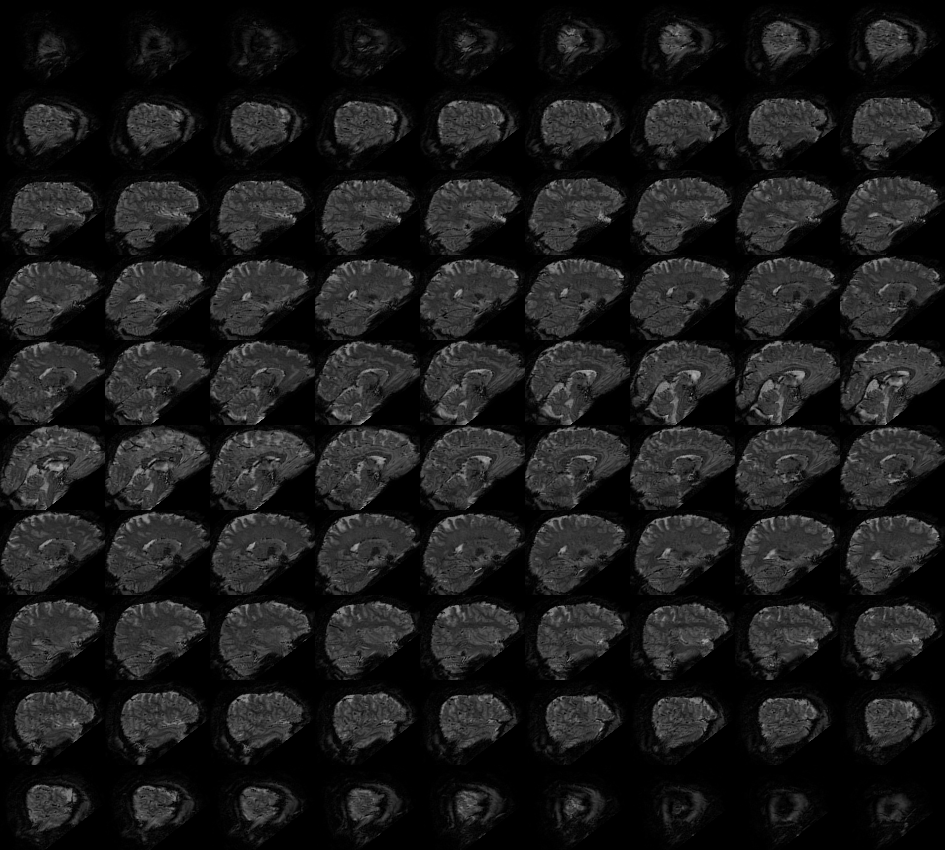
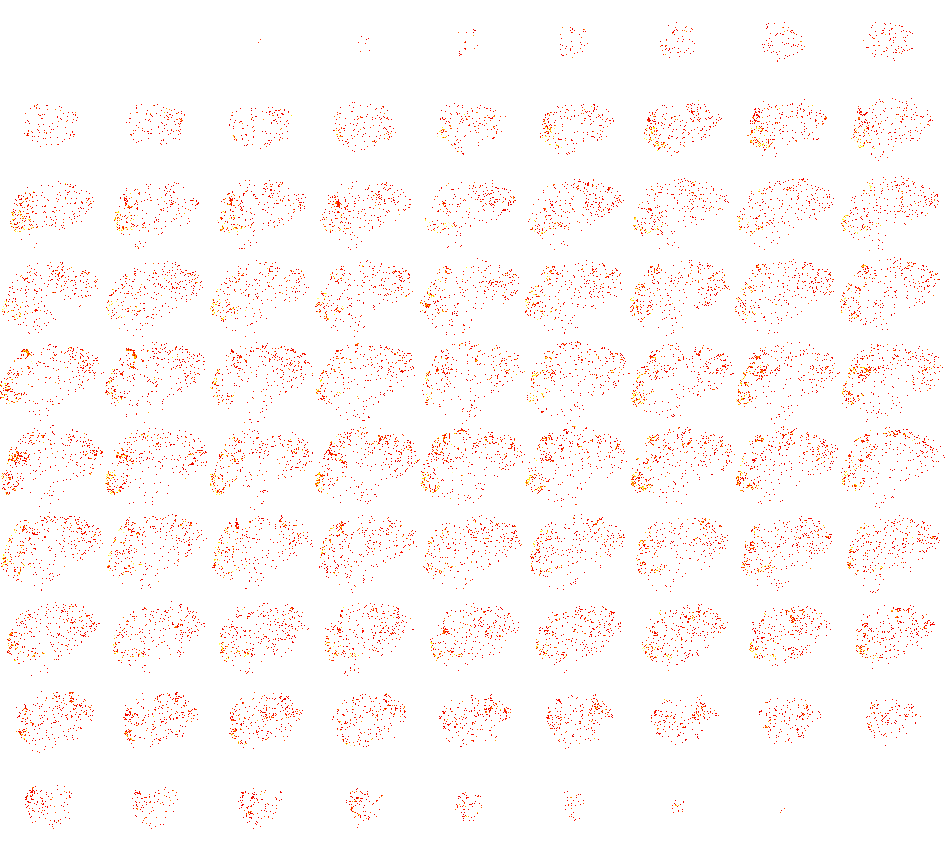

In [3]:
orig_image_fn = '/tank/shared/2022/arrow_of_time/preproc7/sub-001/ses-pilot/func/sub-001_ses-pilot_task-80_acq-nordic_run-01_space-T1w_desc-preproc_bold.nii.gz'
bg_image_fn = '/tank/shared/2022/arrow_of_time/preproc7/sub-001/ses-pilot/func/sub-001_ses-pilot_task-80_acq-nordic_run-01_space-T1w_boldref.nii.gz'
bm_image_fn = '/tank/shared/2022/arrow_of_time/preproc7/sub-001/ses-pilot/func/sub-001_ses-pilot_task-80_acq-nordic_run-01_space-T1w_desc-brain_mask.nii.gz'

bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
R2_masked = np.zeros_like(R2)
R2_masked[bmask] = R2[bmask]

orig_image = nib.load(orig_image_fn)
R2_img = nib.Nifti1Image(R2_masked, affine=orig_image.affine, header=orig_image.header)
R2_img.to_filename('80_R2.nii.gz')
view_img(R2_img, threshold=15, vmax=50, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)

In [4]:
#cmd = "mri_convert"
#cmd = "ls"
#sp.check_output(shlex.split(cmd))#,shell=True)

In [5]:
subject = 'sub-001'

#cortex.freesurfer.import_subj(subject, subject, fs_dir, 'smoothwm')


In [6]:
xfm_name = 'fmriprep_T1w'
transform = cortex.xfm.Transform(np.identity(4), bg_image_fn)
transform.save(subject, xfm_name, 'magnet')

In [7]:
meanvol.shape

(803250,)

In [8]:
meanvol_masked = np.zeros_like(R2)
meanvol_masked[bmask] = meanvol.reshape(R2.shape)[bmask]

HRFindex_masked = np.zeros_like(R2)
HRFindex_masked[bmask] = HRFindex.reshape(R2.shape)[bmask]

fracvalue_masked = np.zeros_like(R2)
fracvalue_masked[bmask] = fracvalue.reshape(R2.shape)[bmask]


In [9]:
# R2_img = nib.Nifti1Image(R2_masked, affine=orig_image.affine, header=orig_image.header)


r2vol = cortex.Volume(R2_masked.T,subject,"fmriprep_T1w",cmap = "inferno")
# meanvolvol = cortex.Volume(meanvol_masked.T,subject,"fmriprep_T1w",cmap = "viridis")
HRFindexvol = cortex.Volume(HRFindex_masked.T,subject,"fmriprep_T1w",cmap = "jet")
fracvaluevol = cortex.Volume(fracvalue_masked.T,subject,"fmriprep_T1w",cmap = "hot")


cortex.webgl.make_static('/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputon7_voxels/80_r2_all', 
                         {"r2vol" : r2vol,
                        # "meanvolvol" : meanvolvol,
                        "HRFindexvol" : HRFindexvol,
                        "fracvaluevol" : fracvaluevol})


In [10]:
cortex.database.default_filestore

'/tank/zhangs/anaconda3/share/pycortex/db'

In [11]:
!ls /tank/zhangs/anaconda3/share/pycortex/db/001/surfaces